In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
%matplotlib inline
from plotly import tools
!sudo pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.offline as offline
!pip install squarify
import squarify
import random
import operator

     |████████████████████████████████| 64 kB 1.9 MB/s 


In [2]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DataScienceProjects/UFC_Data_Analysis/UFC_data.csv')

In [5]:
df.head()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,B__Round1_Grappling_Takedowns_Landed,B__Round1_Strikes_Body Significant Strikes_Attempts,B__Round1_Strikes_Body Significant Strikes_Landed,B__Round1_Strikes_Body Total Strikes_Attempts,B__Round1_Strikes_Body Total Strikes_Landed,B__Round1_Strikes_Clinch Body Strikes_Attempts,B__Round1_Strikes_Clinch Body Strikes_Landed,B__Round1_Strikes_Clinch Head Strikes_Attempts,B__Round1_Strikes_Clinch Head Strikes_Landed,B__Round1_Strikes_Clinch Leg Strikes_Attempts,B__Round1_Strikes_Clinch Leg Strikes_Landed,B__Round1_Strikes_Clinch Significant Kicks_Attempts,B__Round1_Strikes_Clinch Significant Kicks_Landed,B__Round1_Strikes_Clinch Significant Punches_Attempts,B__Round1_Strikes_Clinch Significant Punches_Landed,B__Round1_Strikes_Clinch Significant Strikes_Attempts,B__Round1_Strikes_Clinch Significant Strikes_Landed,B__Round1_Strikes_Clinch Total Strikes_Attempts,B__Round1_Strikes_Clinch Total Strikes_Landed,B__Round1_Strikes_Distance Body Kicks_Attempts,B__Round1_Strikes_Distance Body Kicks_Landed,B__Round1_Strikes_Distance Body Punches_Attempts,B__Round1_Strikes_Distance Body Punches_Landed,B__Round1_Strikes_Distance Body Strikes_Attempts,B__Round1_Strikes_Distance Body Strikes_Landed,B__Round1_Strikes_Distance Head Kicks_Attempts,B__Round1_Strikes_Distance Head Kicks_Landed,...,R__Round5_Strikes_Ground Significant Punches_Attempts,R__Round5_Strikes_Ground Significant Punches_Landed,R__Round5_Strikes_Ground Significant Strikes_Attempts,R__Round5_Strikes_Ground Significant Strikes_Landed,R__Round5_Strikes_Ground Total Strikes_Attempts,R__Round5_Strikes_Ground Total Strikes_Landed,R__Round5_Strikes_Head Significant Strikes_Attempts,R__Round5_Strikes_Head Significant Strikes_Landed,R__Round5_Strikes_Head Total Strikes_Attempts,R__Round5_Strikes_Head Total Strikes_Landed,R__Round5_Strikes_Kicks_Attempts,R__Round5_Strikes_Kicks_Landed,R__Round5_Strikes_Knock Down_Landed,R__Round5_Strikes_Leg Total Strikes_Attempts,R__Round5_Strikes_Leg Total Strikes_Landed,R__Round5_Strikes_Legs Significant Strikes_Attempts,R__Round5_Strikes_Legs Significant Strikes_Landed,R__Round5_Strikes_Legs Total Strikes_Attempts,R__Round5_Strikes_Legs Total Strikes_Landed,R__Round5_Strikes_Punches_Attempts,R__Round5_Strikes_Punches_Landed,R__Round5_Strikes_Significant Strikes_Attempts,R__Round5_Strikes_Significant Strikes_Landed,R__Round5_Strikes_Total Strikes_Attempts,R__Round5_Strikes_Total Strikes_Landed,R__Round5_TIP_Back Control Time,R__Round5_TIP_Clinch Time,R__Round5_TIP_Control Time,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,1,1,23.0,182.0,Trento Italy,2783,Mezzocorona Italy,Marvin Vettori,84,0.0,1.0,1.0,1.0,1.0,0.0,0.0,11.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
1,0,0,32.0,175.0,"Careiro da Várzea, Amazonas Brazil",2208,"Pharr, Texas USA",Carlos Diego Ferreira,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB,blue
2,2,0,38.0,172.0,Kanagawa Japan,721,Tokyo Japan,Takanori Gomi,70,0.0,0.0,0.0,0.0,0.0,7.0,2.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,7.0,2.0,0.0,0.0,...,Na

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Columns: 895 entries, BPrev to winner
dtypes: float64(873), int64(13), object(9)
memory usage: 10.1+ MB


* BPrev: Previous fight by 'Blue' fighter
* B_Age: age of 'Blue' fighter
* B_Height: Height of 'Blue' fighter
* B_Weight: Weight of 'Blue' fighter
* B_location: Location of 'Blue' fighter
* B_HomeTown: HomeTown of 'Blue' fighter

* RPrev: Previous fight by 'Red' fighter
* R_Age: age of 'Red' fighter
* R_Height: Height of 'Red' fighter
* R_Weight: Weight of 'Red' fighter
* R_location: Location of 'Red' fighter
* R_HomeTown: HomeTown of 'Red' fighter

* Date: Date of the fight
* winby: How did the fighter win the fight (decision, submission KO etc.)

In [7]:
df.describe()

,BPrev,BStreak,B_Age,B_Height,B_ID,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,B__Round1_Grappling_Takedowns_Landed,B__Round1_Strikes_Body Significant Strikes_Attempts,B__Round1_Strikes_Body Significant Strikes_Landed,B__Round1_Strikes_Body Total Strikes_Attempts,B__Round1_Strikes_Body Total Strikes_Landed,B__Round1_Strikes_Clinch Body Strikes_Attempts,B__Round1_Strikes_Clinch Body Strikes_Landed,B__Round1_Strikes_Clinch Head Strikes_Attempts,B__Round1_Strikes_Clinch Head Strikes_Landed,B__Round1_Strikes_Clinch Leg Strikes_Attempts,B__Round1_Strikes_Clinch Leg Strikes_Landed,B__Round1_Strikes_Clinch Significant Kicks_Attempts,B__Round1_Strikes_Clinch Significant Kicks_Landed,B__Round1_Strikes_Clinch Significant Punches_Attempts,B__Round1_Strikes_Clinch Significant Punches_Landed,B__Round1_Strikes_Clinch Significant Strikes_Attempts,B__Round1_Strikes_Clinch Significant Strikes_Landed,B__Round1_Strikes_Clinch Total Strikes_Attempts,B__Round1_Strikes_Clinch Total Strikes_Landed,B__Round1_Strikes_Distance Body Kicks_Attempts,B__Round1_Strikes_Distance Body Kicks_Landed,B__Round1_Strikes_Distance Body Punches_Attempts,B__Round1_Strikes_Distance Body Punches_Landed,B__Round1_Strikes_Distance Body Strikes_Attempts,B__Round1_Strikes_Distance Body Strikes_Landed,B__Round1_Strikes_Distance Head Kicks_Attempts,B__Round1_Strikes_Distance Head Kicks_Landed,B__Round1_Strikes_Distance Head Punches_Attempts,B__Round1_Strikes_Distance Head Punches_Landed,B__Round1_Strikes_Distance Head Strikes_Attempts,...,R__Round5_Strikes_Ground Significant Kicks_Attempts,R__Round5_Strikes_Ground Significant Kicks_Landed,R__Round5_Strikes_Ground Significant Punches_Attempts,R__Round5_Strikes_Ground Significant Punches_Landed,R__Round5_Strikes_Ground Significant Strikes_Attempts,R__Round5_Strikes_Ground Significant Strikes_Landed,R__Round5_Strikes_Ground Total Strikes_Attempts,R__Round5_Strikes_Ground Total Strikes_Landed,R__Round5_Strikes_Head Significant Strikes_Attempts,R__Round5_Strikes_Head Significant Strikes_Landed,R__Round5_Strikes_Head Total Strikes_Attempts,R__Round5_Strikes_Head Total Strikes_Landed,R__Round5_Strikes_Kicks_Attempts,R__Round5_Strikes_Kicks_Landed,R__Round5_Strikes_Knock Down_Landed,R__Round5_Strikes_Leg Total Strikes_Attempts,R__Round5_Strikes_Leg Total Strikes_Landed,R__Round5_Strikes_Legs Significant Strikes_Attempts,R__Round5_Strikes_Legs Significant Strikes_Landed,R__Round5_Strikes_Legs Total Strikes_Attempts,R__Round5_Strikes_Legs Total Strikes_Landed,R__Round5_Strikes_Punches_Attempts,R__Round5_Strikes_Punches_Landed,R__Round5_Strikes_Significant Strikes_Attempts,R__Round5_Strikes_Significant Strikes_Landed,R__Round5_Strikes_Total Strikes_Attempts,R__Round5_Strikes_Total Strikes_Landed,R__Round5_TIP_Back Control Time,R__Round5_TIP_Clinch Time,R__Round5_TIP_Control Time,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time
count,1477.000000,1477.000000,1474.000000,1476.000000,1477.000000,1477.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.00000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,...,144.0,144.0,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,27.000000,27.000000,144.000000,144.000000,127.000000,127.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144

In [8]:
print('Number of records: ', df.shape[0])
print('Number of Blue Fighter: ', len(df.B_ID.unique()))
print('Number of Red Fighter: ', len(df.R_ID.unique()))

Number of records:  1477
Number of Blue Fighter:  715
Number of Red Fighter:  627


In [9]:
df.isnull().sum(axis=0)

BPrev                                 0
BStreak                               0
B_Age                                 3
B_Height                              1
B_HomeTown                            6
                                   ... 
R__Round5_TIP_Neutral Time         1333
R__Round5_TIP_Side Control Time    1333
R__Round5_TIP_Standing Time        1333
winby                                16
winner                                0
Length: 895, dtype: int64

In [10]:
df['B_Age'] =df['B_Age'].fillna(np.mean(df['B_Age']))
df['B_Height'] =df['B_Height'].fillna(np.mean(df['B_Height']))

In [11]:
df['R_Age'] =df['R_Age'].fillna(np.mean(df['R_Age']))
df['R_Height'] =df['R_Height'].fillna(np.mean(df['R_Height']))

In [12]:
enable_plotly_in_cell()
temp = df['winner'].value_counts()
fig = {'data': [{'values':temp.values,'labels':temp.index,
                'domain': {'x':[0,1]}, 'hole':.6,'type':'pie'}],
      'layout':{'title':'winner', 'annotations': [{'font':{'size':17}, 
                                                    'showarrow':False,
                                                    'text': 'Who is winning more',
                                                    'x':0.5, 'y':0.5}]}}
iplot(fig, filename='donut')  

Output hidden; open in https://colab.research.google.com to view.

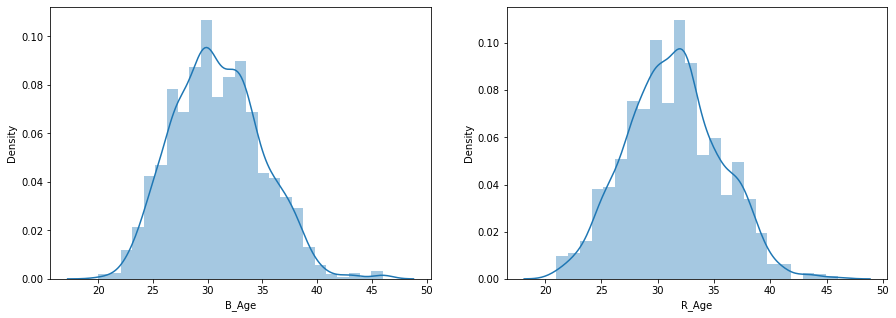

In [13]:
fig, ax = plt.subplots(1,2,figsize=[15,5])
sns.distplot(df.B_Age, ax=ax[0])
sns.distplot(df.R_Age, ax=ax[1])

In [14]:
BAge=df.groupby(['B_Age']).count()['winner']
BlueAge=BAge.sort_values(axis=0,  ascending=False)
BlueAge.head(10)

B_Age
30.0    164
33.0    138
29.0    134
32.0    128
27.0    120
31.0    112
28.0    106
34.0    106
26.0     72
35.0     67
Name: winner, dtype: int64

In [15]:
RAge=df.groupby(['R_Age']).count()['winner']
RedAge=RAge.sort_values(axis=0,  ascending=False)
RedAge.head(10)

R_Age
32.0    169
30.0    156
33.0    141
28.0    116
31.0    114
29.0    111
35.0     92
34.0     81
27.0     78
37.0     76
Name: winner, dtype: int64

Text(0.5, 1.0, 'Age of Red fighters')

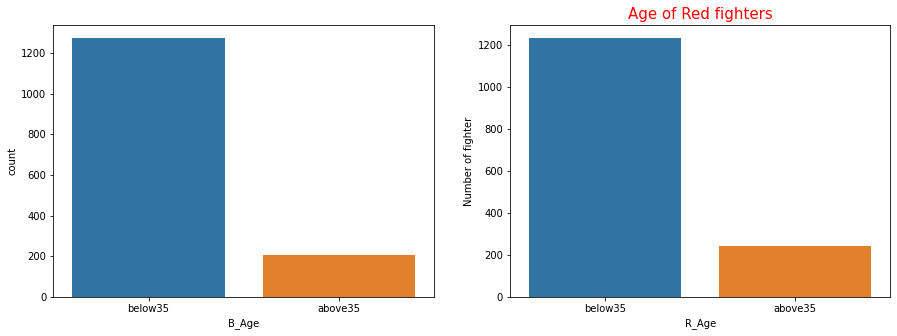

In [16]:
fig, ax = plt.subplots(1,2,figsize=[15,5])
above35 = ['above35' if i>35 else 'below35' for i in df.B_Age]
df_B = pd.DataFrame({'B_Age':above35})
sns.countplot(x=df_B.B_Age, ax=ax[0])
plt.ylabel('Number of fighter')
plt.title('Age of Blue fighters', color='blue', fontsize=15)

above35 = ['above35' if i>35 else 'below35' for i in df.R_Age]
df_R = pd.DataFrame({'R_Age':above35})
sns.countplot(x=df_R.R_Age, ax=ax[1])
plt.ylabel('Number of fighter')
plt.title('Age of Red fighters', color='red', fontsize=15)

In [17]:
df['Age_Difference']=df.B_Age-df.R_Age
df[['Age_Difference', 'winner']].groupby('winner').mean()

,Age_Difference
winner,
blue,-1.459711
draw,-1.555556
no contest,0.058824
red,0.273304


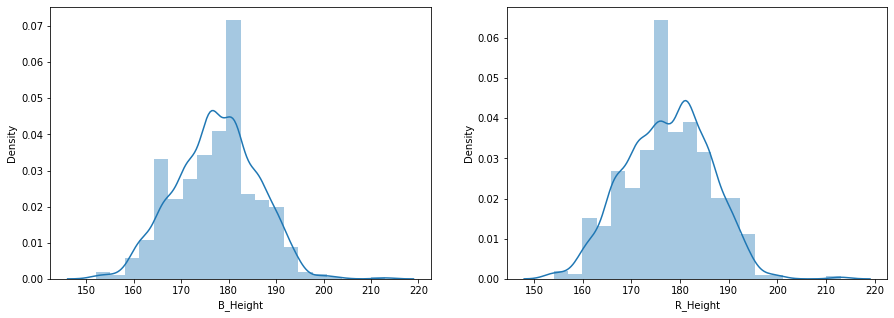

In [18]:
fig, ax=plt.subplots(1,2,figsize=(15,5))
sns.distplot(df.B_Height, bins=20, ax=ax[0]) #Blue
sns.distplot(df.R_Height, bins=20, ax=ax[1]) #Red

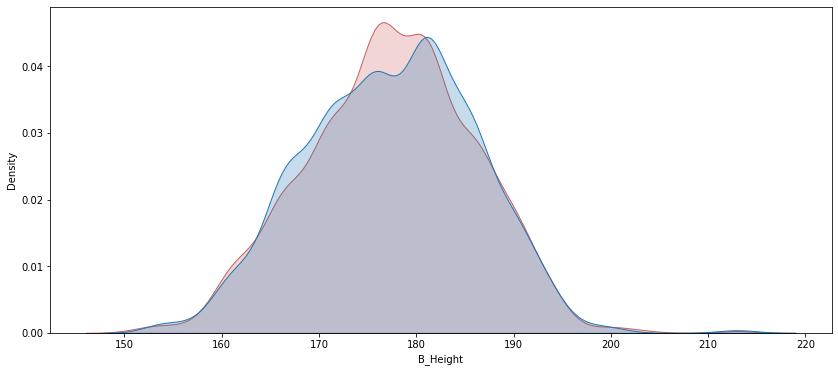

In [19]:
fig, ax=plt.subplots(figsize=(14,6))
sns.kdeplot(df.B_Height, shade=True, color='indianred', label='Red')
sns.kdeplot(df.R_Height, shade=True, label='Blue')

In [20]:
df['Height_Difference']=df.B_Height-df.R_Height
df[['Height_Difference', 'winner']].groupby('winner').mean()

,Height_Difference
winner,
blue,0.118151
draw,2.444444
no contest,-1.411765
red,-0.052536


In [21]:
enable_plotly_in_cell()
temp = df['winby'].value_counts()
fig = {'data': [{'values':temp.values,'labels':temp.index,
                'domain': {'x':[0,1]}, 'hole':.6,'type':'pie'}],
      'layout':{'title':'How fighters are winning?', 
                'annotations': [{'font':{'size':20},
                                 'showarrow':False,
                                 'text': 'Win By', 
                                 'x':0.5, 'y':0.5}]}}
iplot(fig, filename='donut2')  

Output hidden; open in https://colab.research.google.com to view.

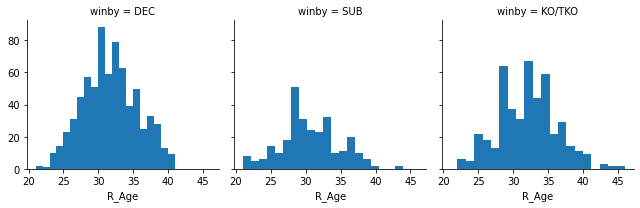

In [22]:
g=sns.FacetGrid(df, col='winby')
g.map(plt.hist, 'R_Age', bins=20)

In [23]:
cnt_srs_r = df['R_Location'].value_counts().head(15)
cnt_srs_r

Rio de Janeiro Brazil                    67
Montreal, Quebec Canada                  30
Coconut Creek, Florida United States     29
Coconut Creek, Florida USA               29
Denver, Colorado USA                     29
Las Vegas, Nevada USA                    24
Sao Paulo Brazil                         22
Albuquerque, New Mexico United States    21
Dublin Ireland                           19
Albuquerque, New Mexico USA              18
Sacramento, California USA               17
Chicago, Illinois USA                    15
San Jose, California USA                 14
Boca Raton, Florida USA                  14
Los Angeles, California USA              14
Name: R_Location, dtype: int64

In [24]:
type(cnt_srs_r)

pandas.core.series.Series

In [25]:
enable_plotly_in_cell()
trace = go.Bar(x=cnt_srs_r.index, y=cnt_srs_r.values, marker=dict(color=cnt_srs_r.values))
layout = go.Layout(title='Most Popular cities for Red fighters')
data = [trace]
fig= go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='Ratio_R')

In [26]:
cnt_srs_b = df['B_Location'].value_counts().head(15)
cnt_srs_b

enable_plotly_in_cell()
trace = go.Bar(x=cnt_srs_b.index, y=cnt_srs_b.values, 
               marker=dict(color=cnt_srs_b.values))
layout = go.Layout(title='Most Popular cities for Blue fighters')
data = [trace]
fig= go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='Ratio_B')

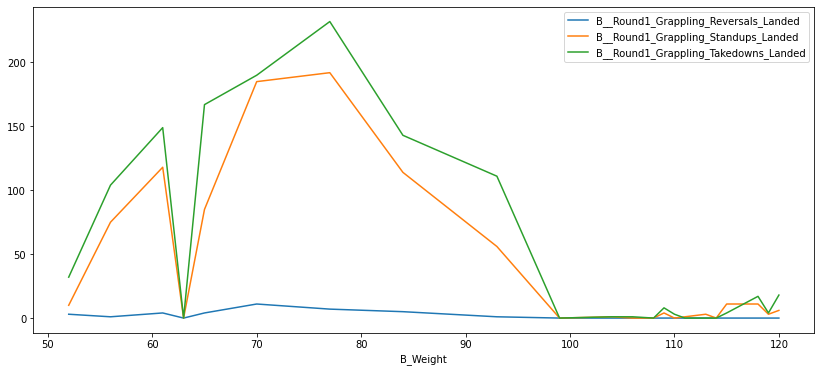

In [27]:
r1_r= df[['B_Weight', 'B__Round1_Grappling_Reversals_Landed', 
        'B__Round1_Grappling_Standups_Landed',
        'B__Round1_Grappling_Takedowns_Landed']].groupby('B_Weight').sum()
r1_r.plot(kind='line', figsize=(14,6))

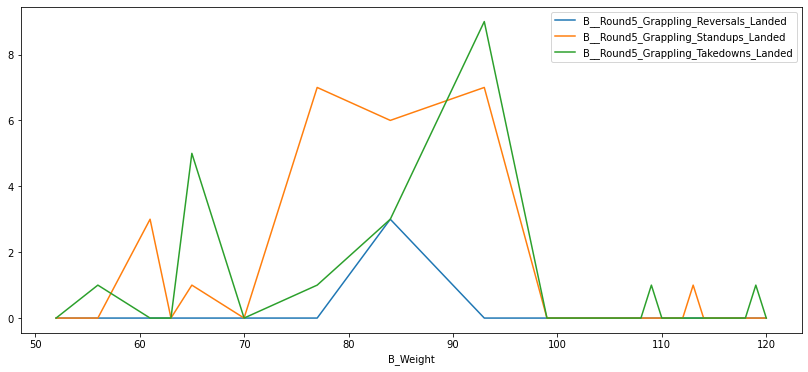

In [28]:
r5_r = df[['B_Weight', 'B__Round5_Grappling_Reversals_Landed', 
        'B__Round5_Grappling_Standups_Landed',
        'B__Round5_Grappling_Takedowns_Landed']].groupby('B_Weight').sum()
r5_r.plot(kind='line', figsize=(14,6))

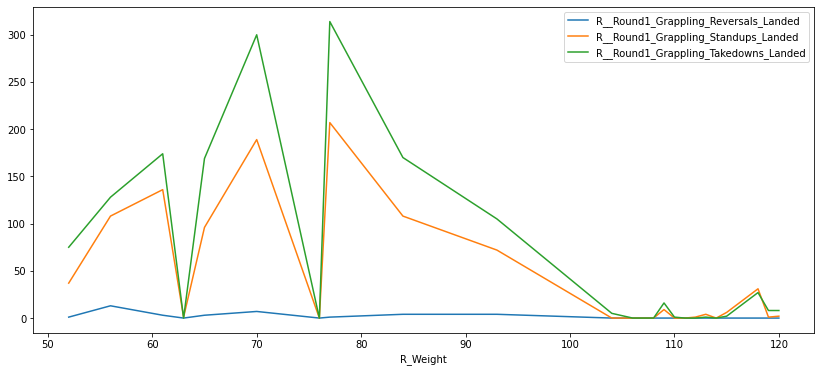

In [29]:
r1_b = df[['R_Weight', 'R__Round1_Grappling_Reversals_Landed', 
        'R__Round1_Grappling_Standups_Landed',
        'R__Round1_Grappling_Takedowns_Landed']].groupby('R_Weight').sum()
r1_b.plot(kind='line', figsize=(14,6))

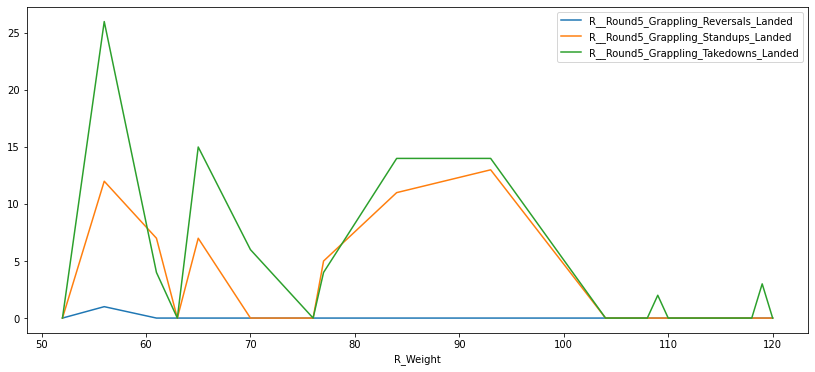

In [30]:
r5_b = df[['R_Weight', 'R__Round5_Grappling_Reversals_Landed', 
        'R__Round5_Grappling_Standups_Landed',
        'R__Round5_Grappling_Takedowns_Landed']].groupby('R_Weight').sum()
r5_b.plot(kind='line', figsize=(14,6))

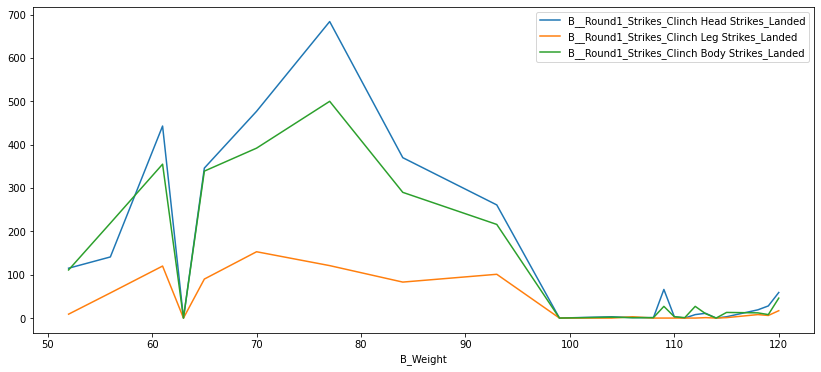

In [31]:
clin_r1_b=df[['B_Weight', 'B__Round1_Strikes_Clinch Head Strikes_Landed', 
             'B__Round1_Strikes_Clinch Leg Strikes_Landed',
             'B__Round1_Strikes_Clinch Body Strikes_Landed']].groupby('B_Weight').sum()
clin_r1_b.plot(kind='line', figsize=(14,6))

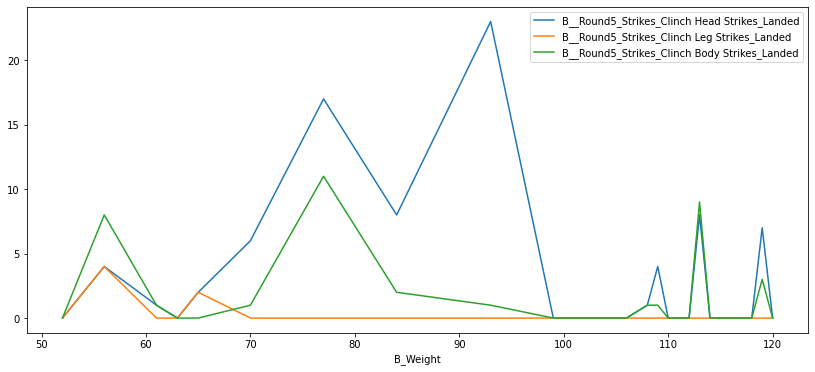

In [32]:
clin_r5_b=df[['B_Weight', 'B__Round5_Strikes_Clinch Head Strikes_Landed', 
             'B__Round5_Strikes_Clinch Leg Strikes_Landed',
             'B__Round5_Strikes_Clinch Body Strikes_Landed']].groupby('B_Weight').sum()
clin_r5_b.plot(kind='line', figsize=(14,6))

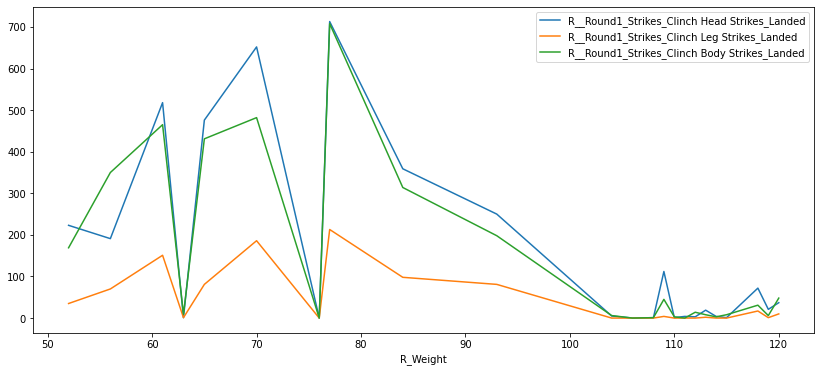

In [33]:
clin_r1_r=df[['R_Weight', 'R__Round1_Strikes_Clinch Head Strikes_Landed', 
             'R__Round1_Strikes_Clinch Leg Strikes_Landed',
             'R__Round1_Strikes_Clinch Body Strikes_Landed']].groupby('R_Weight').sum()
clin_r1_r.plot(kind='line', figsize=(14,6))

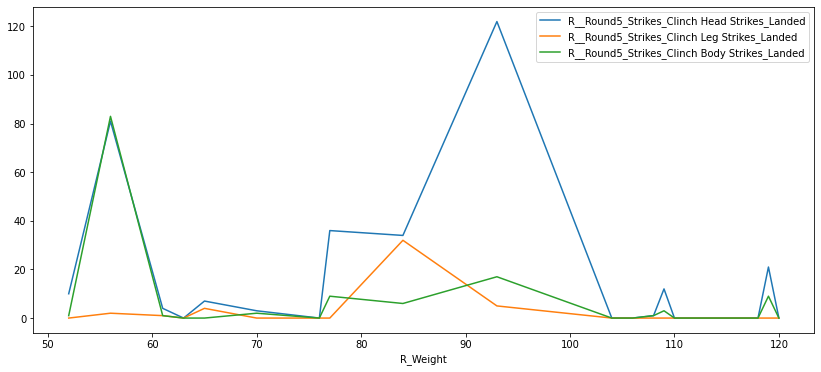

In [34]:
clin_r5_r=df[['R_Weight', 'R__Round5_Strikes_Clinch Head Strikes_Landed', 
             'R__Round5_Strikes_Clinch Leg Strikes_Landed',
             'R__Round5_Strikes_Clinch Body Strikes_Landed']].groupby('R_Weight').sum()
clin_r5_r.plot(kind='line', figsize=(14,6))